In [1]:
!pip3 install git+https://github.com/holounic/Bayesian-Optimization.git

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/holounic/Bayesian-Optimization.git to /tmp/pip-req-build-wjldbk7m
  Running command git clone -q https://github.com/holounic/Bayesian-Optimization.git /tmp/pip-req-build-wjldbk7m
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Cloning https://github.com/holounic/pyDOE to /tmp/pip-install-bzkdjb0j/pydoe_d41a2d1b4c7c412e87ed44a4731efa4b
  Running command git clone -q https://github.com/holounic/pyDOE /tmp/pip-install-bzkdjb0j/pydoe_d41a2d1b4c7c412e87ed44a4731efa4b
     |████████████████████████████████| 62 kB 1.1 MB/s 
     |████████████████████████████████| 316 kB 13.4 MB/s 
  Created wheel for bayes-optim: filename=bayes_optim-0.2.7-py3-none-any.whl size=145057 sha256=e7cc631d423001262d453171f788845cbf6a67e32e39008fee0da06d58468da1
  Stored in directory: /tmp/pip-ephem-wheel-cache-

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from benchmark.bbobbenchmarks import F12
from bayes_optim.search_space import RealSpace

In [5]:
dim = 2
lb, ub = -5, 5
space = RealSpace([lb, ub]) * dim
f_name = 'f12'
f = F12

samples = space.sample(50000)

In [6]:
def fix_numeric_data(df):
  regrets = [float(x[1:-1]) for x in df['regret'].tolist()]
  df['regret'] = regrets
  return df

In [7]:
def minmax_normalisation():
  minmax = []
  for i in range(50):
    func = f(i)
    minmax.append(func(samples).max() - func.getfopt())
  return minmax

In [8]:
def abs_normalisation():
  n = []
  for i in range(50):
    func = f(i)
    n.append(func(samples).mean() - func.getfopt())
  return n

In [9]:
cma_es_50 = fix_numeric_data(pd.read_csv(f'{f_name}_cma_es_doe_normalized_50.csv')[['regret', 'f_s', 'min_dist_to_opt']]).rename(columns={'regret': 'cma_es_50_regret', 'min_dist_to_opt': 'dopt_50_cma'})
cma_es_init_50 = fix_numeric_data(pd.read_csv(f'{f_name}_lhs_initial_doe_normalized_50.csv')[['regret', 'f_s', 'min_dist_to_opt']]).rename(columns={'regret': 'lhs_init_50_regret', 'min_dist_to_opt': 'dopt_50_init'})
cma_es = fix_numeric_data(pd.read_csv(f'{f_name}_cma_es_doe_normalized.csv')[['regret', 'f_s', 'min_dist_to_opt']]).rename(columns={'regret': 'cma_es_regret', 'min_dist_to_opt': 'dopt_cma'})
cma_es_init = fix_numeric_data(pd.read_csv(f'{f_name}_lhs_initial_doe_normalized.csv')[['regret', 'f_s', 'min_dist_to_opt']]).rename(columns={'regret': 'lhs_init_regret', 'min_dist_to_opt': 'dopt_init'})
uniform = fix_numeric_data(pd.read_csv(f'uniform_doe_{f_name}.csv')[['regret', 'f_s', 'min_dist_to_opt']]).rename(columns={'regret': 'uniform_regret', 'min_dist_to_opt': 'dopt_uni'})
lhs = fix_numeric_data(pd.read_csv(f'lhs_doe_{f_name}.csv')[['regret', 'f_s', 'min_dist_to_opt']]).rename(columns={'regret': 'lhs_regret', 'min_dist_to_opt': 'dopt_lhs'})
halton = fix_numeric_data(pd.read_csv(f'halton_doe_{f_name}.csv')[['regret', 'f_s', 'min_dist_to_opt']]).rename(columns={'regret': 'halton_regret', 'min_dist_to_opt': 'dopt_hal'})
sobol = fix_numeric_data(pd.read_csv(f'sobol_doe_{f_name}.csv')[['regret', 'f_s', 'min_dist_to_opt']]).rename(columns={'regret': 'sobol_regret', 'min_dist_to_opt': 'dopt_sob'})
stats = cma_es_50.merge(cma_es_init_50.merge(cma_es.merge(uniform.merge(lhs.merge(sobol.merge(halton.merge(cma_es_init)))))))
stats['minmax_norm'] = minmax_normalisation()
stats['abs_norm'] = abs_normalisation()
stats.head()

,cma_es_50_regret,f_s,dopt_50_cma,lhs_init_50_regret,dopt_50_init,cma_es_regret,dopt_cma,uniform_regret,dopt_uni,lhs_regret,dopt_lhs,sobol_regret,dopt_sob,halton_regret,dopt_hal,lhs_init_regret,dopt_init,minmax_norm,abs_norm
0,1501.407053,0,0.757695,14249.393495,1.755453,7931.797929,1.007349,254.464389,1.783049,232279.387235,1.738064,84.596237,1.468334,58534.371890,1.673038,1668.853686,1.384955,4.104522e+09,7.383801e+07
1,605.987738,1,3.396153,7939.986878,2.328292,888.472181,1.684260,448.294770,2.765552,40006.366296,2.404064,2230.669884,0.929992,1133.412513,2.458174,3070.170670,3.157927,5.924089e+10,6.000289e+09
2,797443.455685,2,3.773249,713.166293,0.476099,84.181734,1.260922,216.617280,3.651258,70897.125412,2.827859,132113.772990,3.957699,38639.061936,3.106208,80047.271964,0.838488,1.685989e+11,5.422091e+09
3,69809.064567,3,2.423826,4849.572167,2.315860,3.051259,3.091063,723761.000305,1.860907,21584.524160,0.847234,9307.488625,2.259305,569.838772,4.022065,1521.362389,0.652716,1.005099e+11,3.581293e+09
4,1654.677312,4,1.004211,46.472641,2.102473,2198.842823,1.619556,653.594849,0.644345,269.886182,1.133699,105.370176,1.801873,3804.543857,2.323823,1276.585396,1.700742,5.571986e+07,9.046381e+06


# CMA-ES on 20 iterations

## vs first individual (generated by LHS)

In [10]:
cma_init = stats.loc[stats['cma_es_regret'] < stats['lhs_init_regret']]
print(f'CMA-ES improved lhs DoE on {cma_init.shape[0]}, ({100 * cma_init.shape[0] / stats.shape[0]}%) function instances')
cma_init[['f_s', 'cma_es_regret', 'lhs_init_regret', 'dopt_cma', 'dopt_init']]

CMA-ES improved lhs DoE on 24, (48.0%) function instances


,f_s,cma_es_regret,lhs_init_regret,dopt_cma,dopt_init
1,1,888.472181,3070.170670,1.684260,3.157927
2,2,84.181734,80047.271964,1.260922,0.838488
3,3,3.051259,1521.362389,3.091063,0.652716
5,5,1616.578948,323909.030910,0.252741,2.132352
6,6,1028.769456,49844.708275,2.738096,2.073946
13,13,8290.276623,16376.526507,1.608625,1.152030
17,17,32.155585,6335.431142,1.448999,1.368290
19,19,55.583681,43413.897418,1.315915,2.377389
21,21,92.490050,2221.519081,1.566991,0.921846
22,22,207.353817,51036.382566,1.987373,1.874347


In [11]:
cma_init = stats.loc[stats['cma_es_regret'] > stats['lhs_init_regret']]
print(f'CMA-ES worstened lhs DoE on {cma_init.shape[0]}, ({100 * cma_init.shape[0] / stats.shape[0]}%) function instances')
cma_init[['f_s', 'cma_es_regret', 'lhs_init_regret', 'dopt_cma', 'dopt_init']]

CMA-ES worstened lhs DoE on 26, (52.0%) function instances


,f_s,cma_es_regret,lhs_init_regret,dopt_cma,dopt_init
0,0,7931.797929,1668.853686,1.007349,1.384955
4,4,2198.842823,1276.585396,1.619556,1.700742
7,7,3111.589288,182.933108,1.595399,1.876180
8,8,965.689909,176.659791,1.847300,1.484704
9,9,245.253138,87.528454,1.875809,0.741622
10,10,2064.526015,29.284710,0.540303,1.363613
11,11,150460.150446,34812.382332,3.390448,0.776705
12,12,1221.969445,122.367482,2.588539,2.137452
14,14,550.309160,195.106312,2.436983,3.354289
15,15,4906.454457,19.591288,2.454008,3.279494


## vs Uniform

In [12]:
cma_uniform = stats.loc[stats['cma_es_regret'] < stats['uniform_regret']]
print(f'DoE generated by CMA-ES is better than uniformly sampled DoE on {cma_uniform.shape[0]}, ({100 * cma_uniform.shape[0] / stats.shape[0]}%) function instances')
cma_uniform[['f_s', 'cma_es_regret', 'uniform_regret']]

DoE generated by CMA-ES is better than uniformly sampled DoE on 24, (48.0%) function instances


,f_s,cma_es_regret,uniform_regret
2,2,84.181734,216.617280
3,3,3.051259,723761.000305
5,5,1616.578948,1731.877363
6,6,1028.769456,54288.215803
9,9,245.253138,918.384788
10,10,2064.526015,4209.118926
14,14,550.309160,9480.907956
16,16,182.152901,1043.255041
18,18,4824.485804,7088.556736
19,19,55.583681,3178.182795


## vs LHS

In [13]:
cma_lhs = stats.loc[stats['cma_es_regret'] < stats['lhs_regret']]
print(f'DoE generated by CMA-ES is better than lhs sampled DoE on {cma_lhs.shape[0]} ({100 * cma_lhs.shape[0] / stats.shape[0]}%) function instances')
cma_lhs[['f_s', 'cma_es_regret', 'lhs_regret', 'dopt_cma', 'dopt_lhs']]

DoE generated by CMA-ES is better than lhs sampled DoE on 28 (56.0%) function instances


,f_s,cma_es_regret,lhs_regret,dopt_cma,dopt_lhs
0,0,7931.797929,232279.387235,1.007349,1.738064
1,1,888.472181,40006.366296,1.684260,2.404064
2,2,84.181734,70897.125412,1.260922,2.827859
3,3,3.051259,21584.524160,3.091063,0.847234
5,5,1616.578948,192675.044137,0.252741,1.516913
6,6,1028.769456,8654.507956,2.738096,1.253677
8,8,965.689909,2910.237017,1.847300,1.051816
9,9,245.253138,1482.453082,1.875809,2.192754
12,12,1221.969445,1919.053412,2.588539,1.774725
14,14,550.309160,4705.625654,2.436983,1.067890


## vs Sobol

In [14]:
cma_sobol = stats.loc[stats['cma_es_regret'] < stats['sobol_regret']]
print(f'DoE generated by CMA-ES is better than sobol generated DoE on {cma_sobol.shape[0]} ({100 * cma_sobol.shape[0] / stats.shape[0]}%) function instances')
cma_sobol[['f_s', 'cma_es_regret', 'sobol_regret', 'dopt_cma', 'dopt_sob']]

DoE generated by CMA-ES is better than sobol generated DoE on 29 (58.0%) function instances


,f_s,cma_es_regret,sobol_regret,dopt_cma,dopt_sob
1,1,888.472181,2230.669884,1.684260,0.929992
2,2,84.181734,132113.772990,1.260922,3.957699
3,3,3.051259,9307.488625,3.091063,2.259305
5,5,1616.578948,9549.294594,0.252741,0.951469
6,6,1028.769456,119622.038447,2.738096,1.873190
8,8,965.689909,21258.304864,1.847300,1.223875
10,10,2064.526015,2470.388194,0.540303,1.937599
13,13,8290.276623,14617.942600,1.608625,2.495886
14,14,550.309160,3555.052797,2.436983,3.488826
16,16,182.152901,996.916387,1.946150,3.368924


## vs Halton

In [15]:
cma_halton = stats.loc[stats['cma_es_regret'] < stats['halton_regret']]
print(f'DoE generated by CMA-ES is better than halton generated DoE on {cma_halton.shape[0]} ({100 * cma_halton.shape[0] / stats.shape[0]}%) function instances')
cma_halton[['f_s', 'cma_es_regret', 'halton_regret', 'dopt_cma', 'dopt_hal']]

DoE generated by CMA-ES is better than halton generated DoE on 25 (50.0%) function instances


,f_s,cma_es_regret,halton_regret,dopt_cma,dopt_hal
0,0,7931.797929,58534.371890,1.007349,1.673038
1,1,888.472181,1133.412513,1.684260,2.458174
2,2,84.181734,38639.061936,1.260922,3.106208
3,3,3.051259,569.838772,3.091063,4.022065
4,4,2198.842823,3804.543857,1.619556,2.323823
8,8,965.689909,2445.030659,1.847300,2.723101
10,10,2064.526015,14684.993366,0.540303,2.364917
14,14,550.309160,14941.192548,2.436983,3.071802
17,17,32.155585,76.409507,1.448999,1.306324
18,18,4824.485804,8214.973733,2.984605,1.387057


## vs CMA-ES 50

In [16]:
cma_halton = stats.loc[stats['cma_es_50_regret'] > stats['cma_es_regret']]
print(f'DoE generated by CMA-ES is better than halton generated DoE on {cma_halton.shape[0]} ({100 * cma_halton.shape[0] / stats.shape[0]}%) function instances')
cma_halton[['f_s', 'cma_es_50_regret', 'cma_es_regret', 'dopt_50_cma', 'dopt_cma']]

DoE generated by CMA-ES is better than halton generated DoE on 26 (52.0%) function instances


,f_s,cma_es_50_regret,cma_es_regret,dopt_50_cma,dopt_cma
2,2,797443.455685,84.181734,3.773249,1.260922
3,3,69809.064567,3.051259,2.423826,3.091063
5,5,3359.322611,1616.578948,1.845087,0.252741
6,6,5018.670834,1028.769456,1.522679,2.738096
8,8,48517.007776,965.689909,3.277764,1.847300
9,9,3464.625655,245.253138,1.017325,1.875809
14,14,3015.687909,550.309160,1.485832,2.436983
17,17,27191.011539,32.155585,1.233873,1.448999
18,18,6310.023969,4824.485804,0.886867,2.984605
19,19,207231.000534,55.583681,0.869497,1.315915


## Best

In [17]:
best_name = 'cma_es_regret'
cma_is_best = stats.loc[(stats[best_name] <= stats['halton_regret']) & (stats[best_name] <= stats['cma_es_regret']) & (stats[best_name] <= stats['cma_es_50_regret']) & (stats[best_name] <= stats['lhs_regret']) & (stats[best_name] <= stats['sobol_regret'])  & (stats[best_name] <= stats['uniform_regret'])]
print(f'DoE generated by CMA-ES is better than any baseline generated DoE on {cma_is_best.shape[0]} ({100 * cma_is_best.shape[0] / stats.shape[0]}%) function instances')
cma_is_best

DoE generated by CMA-ES is better than any baseline generated DoE on 9 (18.0%) function instances


,cma_es_50_regret,f_s,dopt_50_cma,lhs_init_50_regret,dopt_50_init,cma_es_regret,dopt_cma,uniform_regret,dopt_uni,lhs_regret,dopt_lhs,sobol_regret,dopt_sob,halton_regret,dopt_hal,lhs_init_regret,dopt_init,minmax_norm,abs_norm
2,797443.455685,2,3.773249,713.166293,0.476099,84.181734,1.260922,216.617280,3.651258,70897.125412,2.827859,132113.772990,3.957699,38639.061936,3.106208,80047.271964,0.838488,1.685989e+11,5.422091e+09
3,69809.064567,3,2.423826,4849.572167,2.315860,3.051259,3.091063,723761.000305,1.860907,21584.524160,0.847234,9307.488625,2.259305,569.838772,4.022065,1521.362389,0.652716,1.005099e+11,3.581293e+09
14,3015.687909,14,1.485832,1007.253911,2.576096,550.309160,2.436983,9480.907956,5.213890,4705.625654,1.067890,3555.052797,3.488826,14941.192548,3.071802,195.106312,3.354289,4.509441e+10,3.766477e+09
18,6310.023969,18,0.886867,577918.976603,2.079711,4824.485804,2.984605,7088.556736,3.271894,32794.645144,1.705361,121639.385928,1.398422,8214.973733,1.387057,1762.070622,2.905282,2.671099e+11,7.847100e+09
19,207231.000534,19,0.869497,1762.584915,1.688267,55.583681,1.315915,3178.182795,1.783142,91.004268,0.468641,131.705803,1.779954,11034.575008,1.050088,43413.897418,2.377389,1.462539e+09,3.861851e+07
21,13169.452464,21,2.611557,11006.987263,1.940369,92.490050,1.566991,1924.228955,3.519293,5701.437003,1.376074,1415.909801,2.089041,368.169071,2.881158,2221.519081,0.921846,7.302243e+07,2.001596e+07
24,411874.180743,24,1.305278,232422.171805,2.093352,1846.994684,2.492768,42923.518649,1.088008,10173.818185,3.162924,71117.972161,1.097486,9279.385090,2.023401,43687.033184,1.320061,2.796269e+10,6.099864e+08
28,71684.088184,28,1.427907,77841.737785,2.405930,334.716313,1.697043,20179.322794,1.913315,24023.935718,2.380764,97608.321057,1.699189,57135.022727,1.071232,35804.658746,1.511602,1.282769e+11,3.155058e+09
30,678.811788,30,1.620755,48.722340,1.012072,34.041542,2.653364,1374.048891,0.588811,684.556271,1.761817,5372.965579,1.792402,3296.692048,0.962073,272.460999,0.180698,4.242534e+08,3.710014e+07


## Initial individual

In [18]:
best_name = 'lhs_init_regret'
lhs_init_is_best = stats.loc[(stats[best_name] <= stats['halton_regret']) & (stats[best_name] <= stats['cma_es_regret']) & (stats[best_name] <= stats['cma_es_50_regret']) & (stats[best_name] <= stats['lhs_regret']) & (stats[best_name] <= stats['sobol_regret'])  & (stats[best_name] <= stats['uniform_regret'])]
print(f'LHS init is the best on {lhs_init_is_best.shape[0]} ({100 * lhs_init_is_best.shape[0] / stats.shape[0]}%) function instances')
lhs_init_is_best

LHS init is the best on 9 (18.0%) function instances


,cma_es_50_regret,f_s,dopt_50_cma,lhs_init_50_regret,dopt_50_init,cma_es_regret,dopt_cma,uniform_regret,dopt_uni,lhs_regret,dopt_lhs,sobol_regret,dopt_sob,halton_regret,dopt_hal,lhs_init_regret,dopt_init,minmax_norm,abs_norm
8,48517.007776,8,3.277764,1719.205811,0.420496,965.689909,1.847300,611.900511,4.119584,2910.237017,1.051816,21258.304864,1.223875,2445.030659,2.723101,176.659791,1.484704,8.837461e+08,2.091489e+07
12,350.098683,12,1.650999,79.382694,1.316324,1221.969445,2.588539,496.686694,1.582166,1919.053412,1.774725,872.481164,1.789219,718.863844,2.436255,122.367482,2.137452,6.560093e+07,1.596523e+07
14,3015.687909,14,1.485832,1007.253911,2.576096,550.309160,2.436983,9480.907956,5.213890,4705.625654,1.067890,3555.052797,3.488826,14941.192548,3.071802,195.106312,3.354289,4.509441e+10,3.766477e+09
15,1235.040348,15,1.398784,481.082092,2.492464,4906.454457,2.454008,171.878461,4.528454,391.517444,1.653998,168.855321,2.260120,213.292370,1.779746,19.591288,3.279494,7.335577e+07,2.101851e+07
18,6310.023969,18,0.886867,577918.976603,2.079711,4824.485804,2.984605,7088.556736,3.271894,32794.645144,1.705361,121639.385928,1.398422,8214.973733,1.387057,1762.070622,2.905282,2.671099e+11,7.847100e+09
20,37770.878723,20,0.828314,34.360342,1.004092,15927.832143,1.627863,2464.889943,0.570832,639.574621,1.261215,717.781815,2.489243,861.362252,0.975618,48.105057,1.705648,8.110310e+08,2.979874e+07
26,7936.055741,26,2.358663,930.055190,2.599068,408.279085,2.097910,2453.715338,1.499807,292.084459,1.175424,22295.867437,0.306022,4883.311744,1.215753,69.844634,1.145503,9.839110e+07,2.432896e+07
39,33579.803777,39,2.305298,7431.809583,1.023811,284052.966992,1.331363,45441.121985,1.611359,7815.965304,2.573160,12981.992117,2.448908,6236.148732,1.204519,514.367663,1.850095,6.068048e+10,2.323900e+09
49,1895.147220,49,0.528675,5057.974259,2.498961,174.287538,3.178714,337.934982,2.843271,9950.601229,1.745176,4744.241026,0.894938,145.152930,2.731689,104.299013,3.327171,6.775783e+07,1.888592e+07


# CMA-ES on 50 iterations

## vs first individual (generated by LHS)

In [19]:
cma_init = stats.loc[stats['cma_es_50_regret'] < stats['lhs_init_50_regret']]
print(f'CMA-ES improved lhs DoE on {cma_init.shape[0]}, ({100 * cma_init.shape[0] / stats.shape[0]}%) function instances')
cma_init[['f_s', 'cma_es_50_regret', 'lhs_init_50_regret', 'dopt_50_cma', 'dopt_50_init']]

CMA-ES improved lhs DoE on 22, (44.0%) function instances


,f_s,cma_es_50_regret,lhs_init_50_regret,dopt_50_cma,dopt_50_init
0,0,1501.407053,14249.393495,0.757695,1.755453
1,1,605.987738,7939.986878,3.396153,2.328292
6,6,5018.670834,38488.716953,1.522679,2.270223
11,11,4.542944,63275.715371,2.359005,0.902729
13,13,587.275462,1935.054919,3.566567,0.200511
16,16,14.627074,222.093394,1.197020,0.657668
18,18,6310.023969,577918.976603,0.886867,2.079711
22,22,21.725851,574.442055,2.746694,1.092726
23,23,1377.157572,44085.139431,0.441143,2.419321
28,28,71684.088184,77841.737785,1.427907,2.405930


In [20]:
cma_init = stats.loc[stats['cma_es_50_regret'] > stats['lhs_init_50_regret']]
print(f'CMA-ES worstened lhs DoE on {cma_init.shape[0]}, ({100 * cma_init.shape[0] / stats.shape[0]}%) function instances')
cma_init[['f_s', 'cma_es_50_regret', 'lhs_init_50_regret', 'dopt_50_cma', 'dopt_50_init']]

CMA-ES worstened lhs DoE on 28, (56.0%) function instances


,f_s,cma_es_50_regret,lhs_init_50_regret,dopt_50_cma,dopt_50_init
2,2,797443.455685,713.166293,3.773249,0.476099
3,3,69809.064567,4849.572167,2.423826,2.315860
4,4,1654.677312,46.472641,1.004211,2.102473
5,5,3359.322611,2266.804871,1.845087,1.960192
7,7,74.534607,46.845434,0.337104,0.893282
8,8,48517.007776,1719.205811,3.277764,0.420496
9,9,3464.625655,1065.050817,1.017325,0.809095
10,10,15.236569,10.790137,2.105561,2.865805
12,12,350.098683,79.382694,1.650999,1.316324
14,14,3015.687909,1007.253911,1.485832,2.576096


## vs Uniform

In [21]:
cma_uniform = stats.loc[stats['cma_es_50_regret'] < stats['uniform_regret']]
print(f'DoE generated by CMA-ES is better than uniformly sampled DoE on {cma_uniform.shape[0]}, ({100 * cma_uniform.shape[0] / stats.shape[0]}%) function instances')
cma_uniform[['f_s', 'cma_es_50_regret', 'uniform_regret', 'dopt_50_cma', 'dopt_uni']]

DoE generated by CMA-ES is better than uniformly sampled DoE on 23, (46.0%) function instances


,f_s,cma_es_50_regret,uniform_regret,dopt_50_cma,dopt_uni
3,3,69809.064567,723761.000305,2.423826,1.860907
6,6,5018.670834,54288.215803,1.522679,0.578206
7,7,74.534607,91.535708,0.337104,1.273094
10,10,15.236569,4209.118926,2.105561,1.923860
11,11,4.542944,36302.567934,2.359005,3.078625
12,12,350.098683,496.686694,1.650999,1.582166
14,14,3015.687909,9480.907956,1.485832,5.213890
16,16,14.627074,1043.255041,1.197020,2.130527
18,18,6310.023969,7088.556736,0.886867,3.271894
22,22,21.725851,154.648177,2.746694,1.814291


## vs LHS

In [22]:
cma_lhs = stats.loc[stats['cma_es_50_regret'] < stats['lhs_regret']]
print(f'DoE generated by CMA-ES is better than lhs sampled DoE on {cma_lhs.shape[0]} ({100 * cma_lhs.shape[0] / stats.shape[0]}%) function instances')
cma_lhs[['f_s', 'cma_es_50_regret', 'lhs_regret', 'dopt_50_cma', 'dopt_lhs']]

DoE generated by CMA-ES is better than lhs sampled DoE on 27 (54.0%) function instances


,f_s,cma_es_50_regret,lhs_regret,dopt_50_cma,dopt_lhs
0,0,1501.407053,232279.387235,0.757695,1.738064
1,1,605.987738,40006.366296,3.396153,2.404064
5,5,3359.322611,192675.044137,1.845087,1.516913
6,6,5018.670834,8654.507956,1.522679,1.253677
7,7,74.534607,238.598216,0.337104,1.629055
10,10,15.236569,1815.326544,2.105561,1.571984
11,11,4.542944,58841.114036,2.359005,0.816873
12,12,350.098683,1919.053412,1.650999,1.774725
14,14,3015.687909,4705.625654,1.485832,1.067890
16,16,14.627074,882.214462,1.197020,1.755389


## vs Sobol

In [24]:
cma_sobol = stats.loc[stats['cma_es_50_regret'] < stats['sobol_regret']]
print(f'DoE generated by CMA-ES is better than sobol generated DoE on {cma_sobol.shape[0]} ({100 * cma_sobol.shape[0] / stats.shape[0]}%) function instances')
cma_sobol[['f_s', 'cma_es_50_regret', 'sobol_regret', 'dopt_50_cma', 'dopt_sob']]

DoE generated by CMA-ES is better than sobol generated DoE on 28 (56.0%) function instances


,f_s,cma_es_50_regret,sobol_regret,dopt_50_cma,dopt_sob
1,1,605.987738,2230.669884,3.396153,0.929992
5,5,3359.322611,9549.294594,1.845087,0.951469
6,6,5018.670834,119622.038447,1.522679,1.873190
7,7,74.534607,944.635886,0.337104,1.091216
10,10,15.236569,2470.388194,2.105561,1.937599
11,11,4.542944,5935.069212,2.359005,1.327453
12,12,350.098683,872.481164,1.650999,1.789219
13,13,587.275462,14617.942600,3.566567,2.495886
14,14,3015.687909,3555.052797,1.485832,3.488826
16,16,14.627074,996.916387,1.197020,3.368924


## vs Halton

In [25]:
cma_halton = stats.loc[stats['cma_es_50_regret'] < stats['halton_regret']]
print(f'DoE generated by CMA-ES is better than halton generated DoE on {cma_halton.shape[0]} ({100 * cma_halton.shape[0] / stats.shape[0]}%) function instances')
cma_halton[['f_s', 'cma_es_50_regret', 'halton_regret', 'dopt_50_cma', 'dopt_hal']]

DoE generated by CMA-ES is better than halton generated DoE on 25 (50.0%) function instances


,f_s,cma_es_50_regret,halton_regret,dopt_50_cma,dopt_hal
0,0,1501.407053,58534.371890,0.757695,1.673038
1,1,605.987738,1133.412513,3.396153,2.458174
4,4,1654.677312,3804.543857,1.004211,2.323823
7,7,74.534607,210.997632,0.337104,1.226643
10,10,15.236569,14684.993366,2.105561,2.364917
11,11,4.542944,36689.833272,2.359005,1.613451
12,12,350.098683,718.863844,1.650999,2.436255
13,13,587.275462,4645.792949,3.566567,1.268002
14,14,3015.687909,14941.192548,1.485832,3.071802
16,16,14.627074,42.709990,1.197020,1.573175


## vs CMA-ES 20

In [26]:
cma_halton = stats.loc[stats['cma_es_50_regret'] < stats['cma_es_regret']]
print(f'DoE generated by CMA-ES is better than halton generated DoE on {cma_halton.shape[0]} ({100 * cma_halton.shape[0] / stats.shape[0]}%) function instances')
cma_halton[['f_s', 'cma_es_50_regret', 'cma_es_regret', 'dopt_50_cma', 'dopt_cma']]

DoE generated by CMA-ES is better than halton generated DoE on 24 (48.0%) function instances


,f_s,cma_es_50_regret,cma_es_regret,dopt_50_cma,dopt_cma
0,0,1501.407053,7931.797929,0.757695,1.007349
1,1,605.987738,888.472181,3.396153,1.684260
4,4,1654.677312,2198.842823,1.004211,1.619556
7,7,74.534607,3111.589288,0.337104,1.595399
10,10,15.236569,2064.526015,2.105561,0.540303
11,11,4.542944,150460.150446,2.359005,3.390448
12,12,350.098683,1221.969445,1.650999,2.588539
13,13,587.275462,8290.276623,3.566567,1.608625
15,15,1235.040348,4906.454457,1.398784,2.454008
16,16,14.627074,182.152901,1.197020,1.946150


## Best percentage

In [27]:
best_name = 'cma_es_50_regret'
cma_is_best = stats.loc[(stats[best_name] <= stats['halton_regret']) & (stats[best_name] <= stats['cma_es_regret']) & (stats[best_name] <= stats['cma_es_50_regret']) & (stats[best_name] <= stats['lhs_regret']) & (stats[best_name] <= stats['sobol_regret'])  & (stats[best_name] <= stats['uniform_regret'])]
print(f'DoE generated by CMA-ES is better than any baseline generated DoE on {cma_is_best.shape[0]} ({100 * cma_is_best.shape[0] / stats.shape[0]}%) function instances')
cma_is_best

DoE generated by CMA-ES is better than any baseline generated DoE on 10 (20.0%) function instances


,cma_es_50_regret,f_s,dopt_50_cma,lhs_init_50_regret,dopt_50_init,cma_es_regret,dopt_cma,uniform_regret,dopt_uni,lhs_regret,dopt_lhs,sobol_regret,dopt_sob,halton_regret,dopt_hal,lhs_init_regret,dopt_init,minmax_norm,abs_norm
7,74.534607,7,0.337104,46.845434,0.893282,3111.589288,1.595399,91.535708,1.273094,238.598216,1.629055,944.635886,1.091216,210.997632,1.226643,182.933108,1.876180,3.364915e+08,2.266425e+07
10,15.236569,10,2.105561,10.790137,2.865805,2064.526015,0.540303,4209.118926,1.923860,1815.326544,1.571984,2470.388194,1.937599,14684.993366,2.364917,29.284710,1.363613,3.542281e+08,2.102867e+07
11,4.542944,11,2.359005,63275.715371,0.902729,150460.150446,3.390448,36302.567934,3.078625,58841.114036,0.816873,5935.069212,1.327453,36689.833272,1.613451,34812.382332,0.776705,2.770498e+10,8.514318e+08
12,350.098683,12,1.650999,79.382694,1.316324,1221.969445,2.588539,496.686694,1.582166,1919.053412,1.774725,872.481164,1.789219,718.863844,2.436255,122.367482,2.137452,6.560093e+07,1.596523e+07
16,14.627074,16,1.197020,222.093394,0.657668,182.152901,1.946150,1043.255041,2.130527,882.214462,1.755389,996.916387,3.368924,42.709990,1.573175,29.181807,0.600640,7.524270e+07,1.506673e+07
29,141.832996,29,2.527861,661.674089,0.755591,19385.534307,2.134791,907.049743,0.598818,2402.539945,2.037002,11251.697749,1.611805,289.956409,1.885558,1609.876368,1.463649,1.213896e+08,1.467805e+07
34,87.072331,34,2.449594,96.623353,2.411705,425.511293,3.084210,14148.810354,0.805315,13535.657187,3.720046,2732.598067,1.651321,20378.893229,0.949533,22890.813067,0.749634,3.515611e+08,2.036666e+07
40,139.975349,40,1.133633,24387.723833,1.618110,1687.170878,2.252980,1146.468884,3.160663,4390.067607,2.511403,54007.024726,1.671339,3182.632683,2.113913,2030.848705,1.202639,4.602758e+08,3.214585e+07
47,341.220273,47,1.085621,824.078354,1.932249,62176.253383,2.711474,13887.729669,3.357988,4897.018713,1.921454,4980.346446,0.594246,22052.815457,1.034905,17654.928570,2.760673,1.876209e+10,1.769717e+09
48,31.032062,48,0.557691,2765.538025,2.120029,4618.768741,1.374976,94.757949,2.041981,4273.267644,0.318002,2693.662273,0.538402,7438.086220,2.098805,281.729344,1.895584,4.536963e+08,1.742564e+07


## Initial individual

In [28]:
best_name = 'lhs_init_50_regret'
lhs_init_is_best = stats.loc[(stats[best_name] <= stats['halton_regret']) & (stats[best_name] <= stats['cma_es_regret']) & (stats[best_name] <= stats['cma_es_50_regret']) & (stats[best_name] <= stats['lhs_regret']) & (stats[best_name] <= stats['sobol_regret'])  & (stats[best_name] <= stats['uniform_regret'])]
print(f'LHS init is the best on {lhs_init_is_best.shape[0]} ({100 * lhs_init_is_best.shape[0] / stats.shape[0]}%) function instances')
lhs_init_is_best

LHS init is the best on 7 (14.0%) function instances


,cma_es_50_regret,f_s,dopt_50_cma,lhs_init_50_regret,dopt_50_init,cma_es_regret,dopt_cma,uniform_regret,dopt_uni,lhs_regret,dopt_lhs,sobol_regret,dopt_sob,halton_regret,dopt_hal,lhs_init_regret,dopt_init,minmax_norm,abs_norm
4,1654.677312,4,1.004211,46.472641,2.102473,2198.842823,1.619556,653.594849,0.644345,269.886182,1.133699,105.370176,1.801873,3804.543857,2.323823,1276.585396,1.700742,5.571986e+07,9.046381e+06
7,74.534607,7,0.337104,46.845434,0.893282,3111.589288,1.595399,91.535708,1.273094,238.598216,1.629055,944.635886,1.091216,210.997632,1.226643,182.933108,1.876180,3.364915e+08,2.266425e+07
10,15.236569,10,2.105561,10.790137,2.865805,2064.526015,0.540303,4209.118926,1.923860,1815.326544,1.571984,2470.388194,1.937599,14684.993366,2.364917,29.284710,1.363613,3.542281e+08,2.102867e+07
12,350.098683,12,1.650999,79.382694,1.316324,1221.969445,2.588539,496.686694,1.582166,1919.053412,1.774725,872.481164,1.789219,718.863844,2.436255,122.367482,2.137452,6.560093e+07,1.596523e+07
20,37770.878723,20,0.828314,34.360342,1.004092,15927.832143,1.627863,2464.889943,0.570832,639.574621,1.261215,717.781815,2.489243,861.362252,0.975618,48.105057,1.705648,8.110310e+08,2.979874e+07
33,2941.445389,33,3.012356,7.467955,2.474228,648.511060,1.053975,2829.776578,4.860159,3069.593724,2.112136,1027.715472,0.928558,240.468701,1.470236,12035.701605,2.993993,6.786324e+07,1.911218e+07
45,77711.803088,45,2.527156,298.808745,3.180170,8754.392992,2.841122,2190.864473,6.636883,14827.563836,3.388391,27279.204304,2.459886,1614.059297,1.108050,291091.385391,1.578746,4.473682e+09,2.046402e+08


# Baselines

## Uniform

In [29]:
best_name = 'uniform_regret'
uniform_is_best = stats.loc[(stats[best_name] <= stats['halton_regret']) & (stats[best_name] <= stats['cma_es_regret']) & (stats[best_name] <= stats['cma_es_50_regret']) & (stats[best_name] <= stats['lhs_regret']) & (stats[best_name] <= stats['sobol_regret'])  & (stats[best_name] <= stats['uniform_regret'])]
print(f'Uniform is the best on {uniform_is_best.shape[0]} ({100 * uniform_is_best.shape[0] / stats.shape[0]}%) function instances')
uniform_is_best

Uniform is the best on 9 (18.0%) function instances


,cma_es_50_regret,f_s,dopt_50_cma,lhs_init_50_regret,dopt_50_init,cma_es_regret,dopt_cma,uniform_regret,dopt_uni,lhs_regret,dopt_lhs,sobol_regret,dopt_sob,halton_regret,dopt_hal,lhs_init_regret,dopt_init,minmax_norm,abs_norm
1,605.987738,1,3.396153,7939.986878,2.328292,888.472181,1.684260,448.294770,2.765552,40006.366296,2.404064,2230.669884,0.929992,1133.412513,2.458174,3070.170670,3.157927,5.924089e+10,6.000289e+09
8,48517.007776,8,3.277764,1719.205811,0.420496,965.689909,1.847300,611.900511,4.119584,2910.237017,1.051816,21258.304864,1.223875,2445.030659,2.723101,176.659791,1.484704,8.837461e+08,2.091489e+07
17,27191.011539,17,1.233873,60.792959,2.163397,32.155585,1.448999,0.240699,2.894016,546.330954,0.884702,3197.845877,0.986721,76.409507,1.306324,6335.431142,1.368290,6.058422e+07,1.636629e+07
25,281.654739,25,1.658920,41.090938,1.709387,79.391133,3.108612,2.844914,0.551134,59.669392,2.618453,3417.392066,2.570019,1260.487337,1.518993,62.578278,0.879046,5.002652e+07,8.551483e+06
27,2007.910451,27,2.935309,378.570278,0.632461,21545.346262,2.818741,107.932595,1.231071,4633.344019,1.403091,525.916640,1.033367,5008.201370,1.081493,24072.852621,0.907776,6.284707e+08,4.245841e+07
35,1130.052073,35,0.753851,9370.658739,2.440076,14645.370278,2.293753,187.856362,1.280985,55461.998195,2.592514,1142.769700,0.575235,1034.102706,1.050879,790.525080,1.701430,1.554392e+09,4.263522e+07
37,106.909299,37,2.066546,9063.841883,0.599879,31.860181,3.172037,14.751004,1.541929,1351.263039,1.968419,1198.081600,0.660083,113.091280,3.144811,188.338577,1.251113,2.513806e+09,1.701364e+08
38,11682.044237,38,2.463958,288.372461,0.437121,2810.090128,2.092624,93.098723,0.144926,27005.126271,0.970365,12229.153436,2.682238,12555.926448,2.465887,49667.697471,0.428491,1.520381e+10,4.565459e+08
41,264.954112,41,0.653711,1330.021299,0.340069,839.348718,1.061266,8.460941,3.618263,3037.339540,1.798955,441.473707,1.633393,1898.100575,2.372530,30.104287,1.848765,1.196363e+08,1.995263e+07


## Halton

In [30]:
best_name = 'halton_regret'
halton_is_best = stats.loc[(stats[best_name] <= stats['halton_regret']) & (stats[best_name] <= stats['cma_es_regret']) & (stats[best_name] <= stats['cma_es_50_regret']) & (stats[best_name] <= stats['lhs_regret']) & (stats[best_name] <= stats['sobol_regret'])  & (stats[best_name] <= stats['uniform_regret'])]
print(f'Halton is the best on {halton_is_best.shape[0]} ({100 * halton_is_best.shape[0] / stats.shape[0]}%) function instances')
halton_is_best

Halton is the best on 11 (22.0%) function instances


,cma_es_50_regret,f_s,dopt_50_cma,lhs_init_50_regret,dopt_50_init,cma_es_regret,dopt_cma,uniform_regret,dopt_uni,lhs_regret,dopt_lhs,sobol_regret,dopt_sob,halton_regret,dopt_hal,lhs_init_regret,dopt_init,minmax_norm,abs_norm
5,3359.322611,5,1.845087,2266.804871,1.960192,1616.578948,0.252741,1731.877363,0.252463,192675.044137,1.516913,9549.294594,0.951469,483.268226,1.639487,323909.030910,2.132352,1.834908e+09,3.515828e+07
6,5018.670834,6,1.522679,38488.716953,2.270223,1028.769456,2.738096,54288.215803,0.578206,8654.507956,1.253677,119622.038447,1.873190,87.386737,1.094649,49844.708275,2.073946,6.519728e+09,2.785059e+08
9,3464.625655,9,1.017325,1065.050817,0.809095,245.253138,1.875809,918.384788,2.678317,1482.453082,2.192754,221.027010,0.594322,29.947892,1.259310,87.528454,0.741622,5.630436e+08,1.720221e+07
31,3347.451734,31,0.577559,14882.963387,2.800068,2494.818270,2.163877,12817.447285,2.518690,23485.906032,1.506391,69199.702109,1.284769,142.044203,1.396242,9528.122642,1.968460,2.718424e+10,7.213148e+08
33,2941.445389,33,3.012356,7.467955,2.474228,648.511060,1.053975,2829.776578,4.860159,3069.593724,2.112136,1027.715472,0.928558,240.468701,1.470236,12035.701605,2.993993,6.786324e+07,1.911218e+07
36,164.498333,36,1.713266,924.345592,1.475943,3661.400742,2.645806,17698.197594,2.266508,135.853098,0.571571,278.942142,1.316424,22.986269,2.794134,24.248109,0.652379,1.864917e+08,1.305821e+07
39,33579.803777,39,2.305298,7431.809583,1.023811,284052.966992,1.331363,45441.121985,1.611359,7815.965304,2.573160,12981.992117,2.448908,6236.148732,1.204519,514.367663,1.850095,6.068048e+10,2.323900e+09
42,5811.154556,42,3.067586,1243.271205,1.619307,26327.589580,1.859038,69904.185057,4.139055,972.662842,0.997254,27332.546220,1.680466,6.147182,2.099830,28232.343029,2.439863,6.756665e+10,5.440679e+09
44,58725.630279,44,2.387625,7875.163071,0.887662,10329.691504,1.688988,570.961128,2.159386,770.743371,1.487433,9805.214045,1.069699,11.677699,1.704780,16427.544241,1.634513,9.890505e+09,2.306836e+08
45,77711.803088,45,2.527156,298.808745,3.180170,8754.392992,2.841122,2190.864473,6.636883,14827.563836,3.388391,27279.204304,2.459886,1614.059297,1.108050,291091.385391,1.578746,4.473682e+09,2.046402e+08


## LHS

In [31]:
best_name = 'lhs_regret'
lhs_is_best = stats.loc[(stats[best_name] <= stats['halton_regret']) & (stats[best_name] <= stats['cma_es_regret']) & (stats[best_name] <= stats['cma_es_50_regret']) & (stats[best_name] <= stats['lhs_regret']) & (stats[best_name] <= stats['sobol_regret'])  & (stats[best_name] <= stats['uniform_regret'])]
print(f'LHS is the best on {lhs_is_best.shape[0]} ({100 * lhs_is_best.shape[0] / stats.shape[0]}%) function instances')
lhs_is_best

LHS is the best on 4 (8.0%) function instances


,cma_es_50_regret,f_s,dopt_50_cma,lhs_init_50_regret,dopt_50_init,cma_es_regret,dopt_cma,uniform_regret,dopt_uni,lhs_regret,dopt_lhs,sobol_regret,dopt_sob,halton_regret,dopt_hal,lhs_init_regret,dopt_init,minmax_norm,abs_norm
13,587.275462,13,3.566567,1935.054919,0.200511,8290.276623,1.608625,248.865789,1.820731,49.545035,1.214508,14617.942600,2.495886,4645.792949,1.268002,16376.526507,1.152030,7.394267e+07,2.126170e+07
20,37770.878723,20,0.828314,34.360342,1.004092,15927.832143,1.627863,2464.889943,0.570832,639.574621,1.261215,717.781815,2.489243,861.362252,0.975618,48.105057,1.705648,8.110310e+08,2.979874e+07
26,7936.055741,26,2.358663,930.055190,2.599068,408.279085,2.097910,2453.715338,1.499807,292.084459,1.175424,22295.867437,0.306022,4883.311744,1.215753,69.844634,1.145503,9.839110e+07,2.432896e+07
43,9909.461030,43,3.180643,305.204713,0.982844,318.477120,1.849051,4036.112142,3.473430,123.981532,2.112074,3009.894261,0.942394,1881.110986,1.450223,354.202440,1.601392,8.323695e+07,2.439463e+07


## Sobol

In [32]:
best_name = 'sobol_regret'
sobol_is_best = stats.loc[(stats[best_name] <= stats['halton_regret']) & (stats[best_name] <= stats['cma_es_regret']) & (stats[best_name] <= stats['cma_es_50_regret']) & (stats[best_name] <= stats['lhs_regret']) & (stats[best_name] <= stats['sobol_regret'])  & (stats[best_name] <= stats['uniform_regret'])]
print(f'Sobol is the best on {sobol_is_best.shape[0]} ({100 * sobol_is_best.shape[0] / stats.shape[0]}%) function instances')
sobol_is_best

Sobol is the best on 7 (14.0%) function instances


,cma_es_50_regret,f_s,dopt_50_cma,lhs_init_50_regret,dopt_50_init,cma_es_regret,dopt_cma,uniform_regret,dopt_uni,lhs_regret,dopt_lhs,sobol_regret,dopt_sob,halton_regret,dopt_hal,lhs_init_regret,dopt_init,minmax_norm,abs_norm
0,1501.407053,0,0.757695,14249.393495,1.755453,7931.797929,1.007349,254.464389,1.783049,232279.387235,1.738064,84.596237,1.468334,58534.371890,1.673038,1668.853686,1.384955,4.104522e+09,7.383801e+07
4,1654.677312,4,1.004211,46.472641,2.102473,2198.842823,1.619556,653.594849,0.644345,269.886182,1.133699,105.370176,1.801873,3804.543857,2.323823,1276.585396,1.700742,5.571986e+07,9.046381e+06
15,1235.040348,15,1.398784,481.082092,2.492464,4906.454457,2.454008,171.878461,4.528454,391.517444,1.653998,168.855321,2.260120,213.292370,1.779746,19.591288,3.279494,7.335577e+07,2.101851e+07
22,21.725851,22,2.746694,574.442055,1.092726,207.353817,1.987373,154.648177,1.814291,137.464041,1.954156,13.434837,1.171977,178.494784,1.898270,51036.382566,1.874347,7.950335e+07,2.153817e+07
23,1377.157572,23,0.441143,44085.139431,2.419321,26161.713221,2.246165,8788.335245,2.546184,1327.489071,1.672673,86.793395,3.180658,31977.575456,1.095488,6102.359444,2.302931,2.810855e+09,5.267218e+07
32,8207.705893,32,1.328271,1166.624292,2.021685,3570.421820,2.588337,41589.008936,2.977154,663.169266,1.358129,55.069964,1.265696,151.868181,0.761861,1145.157032,1.228766,2.079360e+09,6.126521e+07
46,369.176379,46,1.602403,246514.312203,3.029252,3915.414206,1.728993,41435.271852,1.751291,577.527207,1.500500,312.664583,1.576969,406.254312,1.849078,2841.494219,2.459500,9.492872e+08,2.083838e+07


# Boxplots

([<matplotlib.axis.XTick at 0x7fbf4659da50>,
 [Text(0, 0, 'cma_es_50'),
  Text(0, 0, 'lhs_init_50'),
  Text(0, 0, 'cma_es'),
  Text(0, 0, 'lhs_init'),
  Text(0, 0, 'uniform'),
  Text(0, 0, 'halton'),
  Text(0, 0, 'sobol'),
  Text(0, 0, 'lhs')])

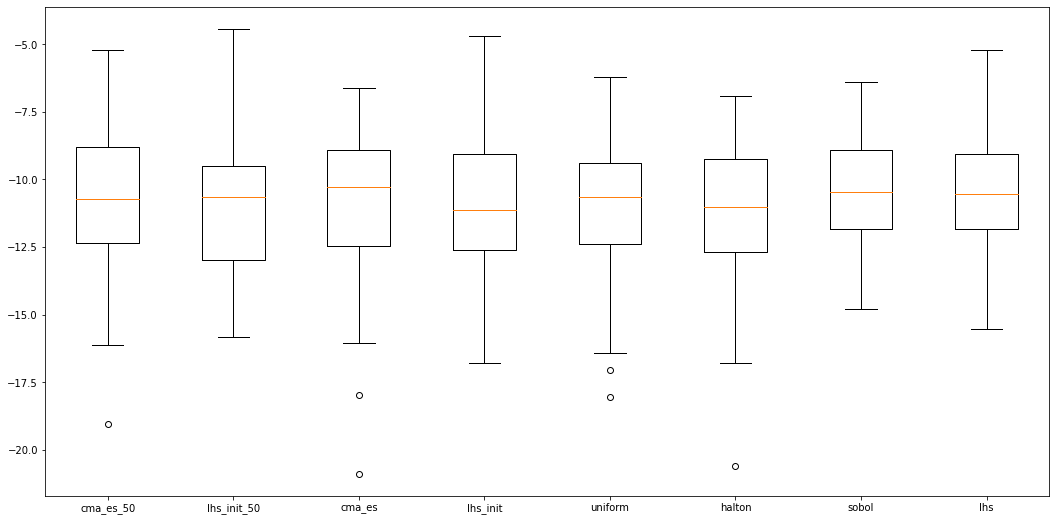

In [33]:
plt.rcParams["figure.figsize"] = (18, 9)

methods = ['cma_es_50', 'lhs_init_50', 'cma_es', 'lhs_init', 'uniform', 'halton', 'sobol', 'lhs']
plt.boxplot([np.log(stats[method + '_regret'].div(stats['abs_norm'])) for method in methods])
plt.xticks(list(range(1, len(methods) + 1)), methods)

([<matplotlib.axis.XTick at 0x7fbf463ec1d0>,
 [Text(0, 0, 'cma_es_50'),
  Text(0, 0, 'lhs_init_50'),
  Text(0, 0, 'cma_es'),
  Text(0, 0, 'lhs_init'),
  Text(0, 0, 'uniform'),
  Text(0, 0, 'halton'),
  Text(0, 0, 'sobol'),
  Text(0, 0, 'lhs')])

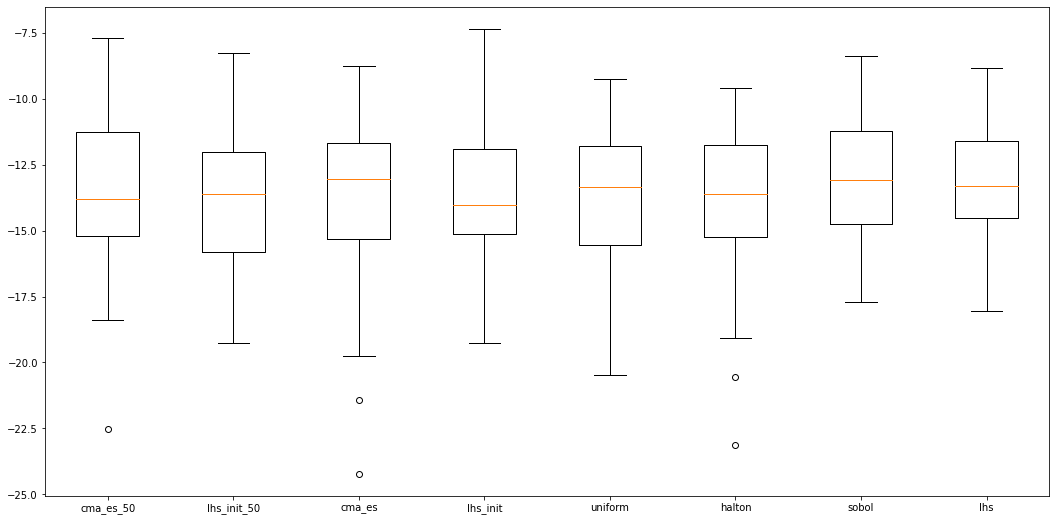

In [34]:
plt.rcParams["figure.figsize"] = (18, 9)

methods = ['cma_es_50', 'lhs_init_50', 'cma_es', 'lhs_init', 'uniform', 'halton', 'sobol', 'lhs']
plt.boxplot([np.log(stats[method + '_regret'].div(stats['minmax_norm'])) for method in methods])
plt.xticks(list(range(1, len(methods) + 1)), methods)